In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/title-generation/sample_submission.csv
/kaggle/input/title-generation/vocs.pkl
/kaggle/input/title-generation/train.csv
/kaggle/input/title-generation/test.csv
/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json


In [2]:
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
def la(df: pd.DataFrame):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df

In [4]:
train = pd.read_csv("/kaggle/input/title-generation/train.csv")
train

,abstract,title
0,"we consider the problem of utility maximization for investors with power utility functions. building on the earlier work larsen et al. (2016), we prove that the value of the problem is a frechet-differentiable function of the drift of the price process, provided that this drift lies in a suitable banach space. we then study optimal investment problems with non-markovian driving processes. in such models there is no hope to get a formula for the achievable maximal utility. applying results of the first part of the paper we provide first order expansions for certain problems involving fractional brownian motion either in the drift or in the volatility. we also point out how asymptotic results can be derived for models with strong mean reversion.",on optimal investment with processes of long or negative memory
1,"in this paper we provide an explicit formula for calculating the boolean number of a ferrers graph. by previous work of the last two authors, this determines the homotopy type of the boolean complex of the graph. specializing to staircase shapes, we show that the boolean numbers of the associated ferrers graphs are the genocchi numbers of the second kind, and obtain a relation between the legendre-stirling numbers and the genocchi numbers of the second kind. in another application, we compute the boolean number of a complete bipartite graph, corresponding to a rectangular ferrers shape, which is expressed in terms of the stirling numbers of the second kind. finally, we analyze the complexity of calculating the boolean number of a ferrers graph using these results and show that it is a significant improvement over calculating by edge recursion.",boolean complexes for ferrers graphs
2,"kinesin-5, also known as eg5 in vertebrates is a processive motor with 4 heads, which moves on filamentous tracks called microtubules. the basic function of kinesin-5 is to slide apart two anti-parallel microtubules by simultaneously walking on both the microtubules. we develop an analytical expression for the steady-state relative velocity of this sliding in terms of the rates of attachments and detachments of motor heads with the atpase sites on the microtubules. we first analyse the motion of one pair of motor heads on one microtubule and then couple it to the motion of the other pair of motor heads of the same motor on the second microtubule to get the relative velocity of sliding.",relative velocity of sliding of microtubules by the action of kinesin-5
3,"we discuss the transition paths in a coupled bistable system consisting of interacting multiple identical bistable motifs. we propose a simple model of coupled bistable gene circuits as an example, and show that its transition paths are bifurcating. we then derive a criterion to predict the bifurcation of transition paths in a generalized coupled bistable system. we confirm the validity of the theory for the example system by numerical simulation. we also demonstrate in the example system that, if the steady states of individual gene circuits are not changed by the coupling, the bifurcation pattern is not dependent on the number of gene circuits. we further show that the transition rate exponentially decreases with the number of gene circuits when the transition path does not bifurcate, while a bifurcation facilitates the transition by lowering the quasi-potential energy barrier.",bifurcation of transition paths induced by coupled bistable systems
4,"two types of room temperature detectors of terahertz laser radiation have been developed which allow in an all-electric manner to determine the plane of polarization of linearly polarized radiation and the ellipticity of elliptically polarized radiation, respectively. the operation of the detectors is based on photogalvanic effects in semiconductor quantum well structures of low symmetry. the photogalvanic effects have sub-nanosecond time constants at room temperature making a high time resolution of the polarization det

In [5]:
train['A_len_ch'] = train.abstract.str.len()
train['T_len_ch'] = train.title.str.len()
train['A_len_w'] = train.abstract.str.split().map(len)
train['T_len_w'] = train.title.str.split().map(len)
train

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
0,"we consider the problem of utility maximization for investors with power utility functions. building on the earlier work larsen et al. (2016), we prove that the value of the problem is a frechet-differentiable function of the drift of the price process, provided that this drift lies in a suitable banach space. we then study optimal investment problems with non-markovian driving processes. in such models there is no hope to get a formula for the achievable maximal utility. applying results of the first part of the paper we provide first order expansions for certain problems involving fractional brownian motion either in the drift or in the volatility. we also point out how asymptotic results can be derived for models with strong mean reversion.",on optimal investment with processes of long or negative memory,755,63,122,10
1,"in this paper we provide an explicit formula for calculating the boolean number of a ferrers graph. by previous work of the last two authors, this determines the homotopy type of the boolean complex of the graph. specializing to staircase shapes, we show that the boolean numbers of the associated ferrers graphs are the genocchi numbers of the second kind, and obtain a relation between the legendre-stirling numbers and the genocchi numbers of the second kind. in another application, we compute the boolean number of a complete bipartite graph, corresponding to a rectangular ferrers shape, which is expressed in terms of the stirling numbers of the second kind. finally, we analyze the complexity of calculating the boolean number of a ferrers graph using these results and show that it is a significant improvement over calculating by edge recursion.",boolean complexes for ferrers graphs,855,36,138,5
2,"kinesin-5, also known as eg5 in vertebrates is a processive motor with 4 heads, which moves on filamentous tracks called microtubules. the basic function of kinesin-5 is to slide apart two anti-parallel microtubules by simultaneously walking on both the microtubules. we develop an analytical expression for the steady-state relative velocity of this sliding in terms of the rates of attachments and detachments of motor heads with the atpase sites on the microtubules. we first analyse the motion of one pair of motor heads on one microtubule and then couple it to the motion of the other pair of motor heads of the same motor on the second microtubule to get the relative velocity of sliding.",relative velocity of sliding of microtubules by the action of kinesin-5,694,71,115,11
3,"we discuss the transition paths in a coupled bistable system consisting of interacting multiple identical bistable motifs. we propose a simple model of coupled bistable gene circuits as an example, and show that its transition paths are bifurcating. we then derive a criterion to predict the bifurcation of transition paths in a generalized coupled bistable system. we confirm the validity of the theory for the example system by numerical simulation. we also demonstrate in the example system that, if the steady states of individual gene circuits are not changed by the coupling, the bifurcation pattern is not dependent on the number of gene circuits. we further show that the transition rate exponentially decreases with the number of gene circuits when the transition path does not bifurcate, while a bifurcation facilitates the transition by lowering the quasi-potential energy barrier.",bifurcation of transition paths induced by coupled bistable systems,892,67,138,9
4,"two types of room temperature detectors of terahertz laser radiation have been developed which allow in an all-electric manner to determine the plane of polarization of linearly polarized radiation and the ellipticity of elliptically polarized radiation, respectively. the operation of the detectors is based on photogalvanic effects in semiconductor quantum well structures of low symmetry. the photogalvanic effects have sub-nanosecond 

In [6]:
train[['A_len_w','T_len_w']].corr()

,A_len_w,T_len_w
A_len_w,1.000000,0.176195
T_len_w,0.176195,1.000000


In [7]:
train.describe()

,A_len_ch,T_len_ch,A_len_w,T_len_w
count,135000.000000,135000.000000,135000.000000,135000.000000
mean,928.194793,72.609348,137.693119,9.455415
std,420.907500,27.130554,62.278867,3.634541
min,4.000000,4.000000,1.000000,1.000000
25%,611.000000,53.000000,91.000000,7.000000
50%,894.000000,69.000000,132.000000,9.000000
75%,1219.000000,89.000000,180.000000,12.000000
max,3871.000000,343.000000,584.000000,39.000000


<AxesSubplot:>

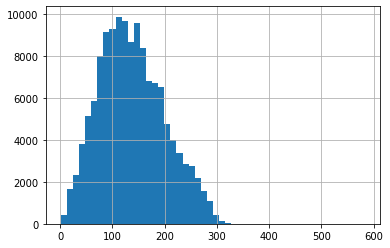

In [8]:
train.A_len_w.hist(bins=50)

<AxesSubplot:>

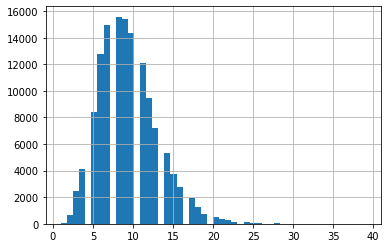

In [9]:
train.T_len_w.hist(bins=50)

In [10]:
la(train.sort_values(["A_len_w","T_len_w"]).head(50))

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
605,yes.,are theoretical results 'results'?,4,34,1,4
120833,without abstract.,(erratum) an f(r) gravitation for galactic environments,17,55,2,7
25023,on page 13.,on vortices and solitons in goldstone and abelian-higgs models,11,62,3,9
103078,withdrawn by author,investigating rare diffusion events in silicon by temperature-accelerated tight-binding molecular dynamics,19,108,3,11
58828,no abstract; review only,review of haplotype complementarity under mutational pressure,24,61,4,7
99606,some errors in equations,quantum capacitance spectroscopy of single nanotube molecules,24,61,4,7
116290,this paper is withdrawn.,local rigidity of surfaces in space forms,24,41,4,7
132422,this paper is withdrawn,multi-color randomly reinforced urn for adaptive designs,23,56,4,7
133646,this paper is withdrawn,multi-color randomly reinforced urn for adaptive designs,23,56,4,7
80598,paper removed: double submission,back-in-time dynamics of the cluster ie 0657-56 (the bullet system),32,67,4,10


In [11]:
train.sort_values(["A_len_w","T_len_w"]).head(100)[train.abstract.str.contains("comment|rejoinder|arxiv", case=False)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
45150,"comment on ""citation statistics"" [arxiv:0910.3529]",comment: citation statistics,50,28,5,3
54514,"comment on ""citation statistics"" [arxiv:0910.3529]",comment: citation statistics,50,28,5,3
81415,"rejoinder to ""citation statistics"" [arxiv:0910.3529]",rejoinder: citation statistics,52,30,5,3
101524,"comment on ""citation statistics"" [arxiv:0910.3529]",comment: citation statistics,50,28,5,3
114818,"comment on ""citation statistics"" [arxiv:0910.3529]",comment: citation statistics,50,28,5,3
118397,"rejoinder to ""citation statistics"" [arxiv:0910.3529]",rejoinder: citation statistics,52,30,5,3
86398,this is a comment on hep-th/0702136,"comment on ""is there a ""most perfect fluid"" consistent with quantum field theory?""",35,84,6,13
90197,this article has been replaced by arxiv:0906.4031,a solid angle polynomial with negative coefficients,49,51,7,7
36751,comment on ``lancaster probabilities and gibbs sampling'' [arxiv:0808.3852],comment: lancaster probabilities and gibbs sampling,75,51,8,6
42336,"rejoinder to ""the future of indirect evidence"" [arxiv:1012.1161]",rejoinder: the future of indirect evidence,64,42,8,6


In [12]:
train[train.abstract.str.startswith("comment")]

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
998,comment on ``demystifying double robustness: a comparison of alternative strategies for estimating a population mean from incomplete data'' [arxiv:0804.2958],comment: demystifying double robustness: a comparison of alternative strategies for estimating a population mean from incomplete data,157,135,19,17
2114,"comment on ""quantifying the fraction of missing information for hypothesis testing in statistical and genetic studies"" [arxiv:1102.2774]",comment: quantifying information loss in survival studies,136,57,17,7
2902,comment on ``demystifying double robustness: a comparison of alternative strategies for estimating a population mean from incomplete data'' [arxiv:0804.2958],comment: demystifying double robustness: a comparison of alternative strategies for estimating a population mean from incomplete data,157,135,19,17
4761,comment: bayesian checking of the second levels of hierarchical models [arxiv:0802.0743],comment: bayesian checking of the second levels of hierarchical models,88,70,11,10
5215,"comment on ``microarrays, empirical bayes and the two-groups model'' [arxiv:0808.0572]","comment: microarrays, empirical bayes and the two-groups model",86,62,10,8
...,...,...,...,...,...,...
129200,comment: expert elicitation for reliable system design [arxiv:0708.0279],comment: expert elicitation for reliable system design,72,54,8,7
129575,comment: struggles with survey weighting and regression modeling [arxiv:0710.5005],comment: struggles with survey weighting and regression modeling,82,64,9,8
131932,comment: bayesian checking of the second levels of hierarchical models [arxiv:0802.0743],comment: bayesian checking of the second levels of hierarchical models,88,70,11,10
132711,comment: bayesian checking of the second level of hierarchical models [arxiv:0802.0743],comment: bayesian checking of the second level of hierarchical models: cross-validated posterior predictive checks using discrepancy measures,87,143,11,17


In [13]:
train[train.abstract.str.endswith("]")]

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
560,rejoinder: 2004 ims medallion lecture: local rademacher complexities and oracle inequalities in risk minimization [arxiv:0708.0083],rejoinder: 2004 ims medallion lecture: local rademacher complexities and oracle inequalities in risk minimization,131,115,15,14
708,"discussion of ""feature matching in time series modeling"" by y. xia and h. tong [arxiv:1104.3073]","discussion of ""feature matching in time series modeling"" by y. xia and h. tong",96,80,15,14
998,comment on ``demystifying double robustness: a comparison of alternative strategies for estimating a population mean from incomplete data'' [arxiv:0804.2958],comment: demystifying double robustness: a comparison of alternative strategies for estimating a population mean from incomplete data,157,135,19,17
1815,discussion of ``2004 ims medallion lecture: local rademacher complexities and oracle inequalities in risk minimization'' by v. koltchinskii [arxiv:0708.0083],discussion of ``2004 ims medallion lecture: local rademacher complexities and oracle inequalities in risk minimization'' by v. koltchinskii,157,143,19,18
2114,"comment on ""quantifying the fraction of missing information for hypothesis testing in statistical and genetic studies"" [arxiv:1102.2774]",comment: quantifying information loss in survival studies,136,57,17,7
...,...,...,...,...,...,...
133638,comment: expert elicitation for reliable system design [arxiv:0708.0279],comment: expert elicitation for reliable system design,72,54,8,7
133890,we are grateful to all discussants of our re-visitation for their strong support in our enterprise and for their overall agreement with our perspective. further discussions with them and other leading statisticians showed that the legacy of theory of probability is alive and lasting. [arxiv:0804.3173],rejoinder: harold jeffreys's theory of probability revisited,302,60,45,7
133920,"discussion of ``the william kruskal legacy: 1919--2005'' by stephen e. fienberg, stephen m. stigler and judith m. tanur [arxiv:0710.5063]",william kruskal remembered,137,26,19,3
134174,"rejoinder to ""quantifying the fraction of missing information for hypothesis testing in statistical and genetic studies"" [arxiv:1102.2774]",rejoinder: quantifying the fraction of missing information for hypothesis testing in statistical and genetic studies,138,118,17,15


In [14]:
train[train.abstract.str.startswith("comment")][~train.title.str.startswith("comment:")]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
15778,comment on article by ferreira and gamerman [arxiv:1509.03410].,comment on article by ferreira and gamerman,63,43,8,7
18022,comment on ``chiral suppression of scalar glueball decay'',"comment on ""chiral suppression of scalar glueball decay""",58,56,8,8
30951,"comment on paper by p.w. anderson is presented. this anderson's work is shown to contain a number of inaccurate and ungrounded statements. we point out, in particular, that the total static dielectric function not only can be negative, but inevitably has a minus sign in many stable systems. we also demonstrate that in many metals, the effective electron-phonon interaction is stronger than the direct coulomb repulsion, without taking into account the ladder-sum renormalization or pseudization of the coulomb repulsion. other issues touched in anderson's paper are also discussed.",a little about folklore,583,23,88,4
35909,comment on article by ferreira and gamerman [arxiv:1509.03410].,comment on article by ferreira and gamerman,63,43,8,7
37184,"comment on ""harold jeffreys's theory of probability revisited"" [arxiv:0804.3173]","comment on ""harold jeffreys's theory of probability revisited""",80,62,9,8
42055,comment on article by ferreira and gamerman [arxiv:1509.03410].,comment on article by ferreira and gamerman,63,43,8,7
43071,"comment on ""harold jeffreys's theory of probability revisited"" [arxiv:0804.3173]","comment on ""harold jeffreys's theory of probability revisited""",80,62,9,8
47396,"comment on ""liquids on topologically nanopatterned surfaces"" by o. gang et al, phys. rev. lett. 95, 217801 (2005). see also an erratum published by o. gang et al (phys rev lett, to appear)","comment on ""liquids on topologically nanopatterned surfaces""",190,60,33,7
48022,"comment on ""harold jeffreys's theory of probability revisited"" [arxiv:0804.3173]","comment on ""harold jeffreys's theory of probability revisited""",80,62,9,8
56878,"comment on ""harold jeffreys's theory of probability revisited"" [arxiv:0804.3173]","comment on ""harold jeffreys's theory of probability revisited""",80,62,9,8


In [15]:
la(train.sort_values(["A_len_ch","T_len_ch"]).head(50))

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
605,yes.,are theoretical results 'results'?,4,34,1,4
25023,on page 13.,on vortices and solitons in goldstone and abelian-higgs models,11,62,3,9
120833,without abstract.,(erratum) an f(r) gravitation for galactic environments,17,55,2,7
103078,withdrawn by author,investigating rare diffusion events in silicon by temperature-accelerated tight-binding molecular dynamics,19,108,3,11
132422,this paper is withdrawn,multi-color randomly reinforced urn for adaptive designs,23,56,4,7
133646,this paper is withdrawn,multi-color randomly reinforced urn for adaptive designs,23,56,4,7
116290,this paper is withdrawn.,local rigidity of surfaces in space forms,24,41,4,7
58828,no abstract; review only,review of haplotype complementarity under mutational pressure,24,61,4,7
99606,some errors in equations,quantum capacitance spectroscopy of single nanotube molecules,24,61,4,7
17639,this paper has been withdrawn,on dual quadri-algebras,29,23,5,3


In [16]:
la(train.sort_values(["T_len_ch"]).head(50))

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
19851,"essential introduction to glial cells with emphasis on astrocytes, microglia and their interplay in reactive astrogliosis.",glia,122,4,16,1
94790,"you shall not find any new physics, because all physical events are interpreted well-known particles (leptons, quarks, photons, gluons, w-bosons, z-boson) and forces which have long known (electroweak, gravity, strong interactions). contents: 1. pointlike events and probability. 2. leptons' moving equations and masses. 3. fermion-antifermion asommetry. 4. electroweak equations. 5. chromatic states and gluons. 6. asimptotic freedom, confinement, newton's gravity. 7. dark energy and dark matter. 8. events and particles. 9. conclusion.",zero,540,4,72,1
76272,new results on properties and decays of open charm and charmonium states are reviewed. the emphasis is on examples that illustrate the various aspects through which studies of charm physics impact the field.,charm,207,5,33,1
76290,"categorical orthodoxy has it that collections of ordinary mathematical structures such as groups, rings, or spaces, form categories (such as the category of groups); collections of 1-dimensional categorical structures, such as categories, monoidal categories, or categories with finite limits, form 2-categories; and collections of 2-dimensional categorical structures, such as 2-categories or bicategories, form 3-categories. we describe a useful way in which to regard bicategories as objects of a 2-category. this is a bit surprising both for technical and for conceptual reasons. the 2-cells of this 2-category are the crucial new ingredient; they are the icons of the title. these can be thought of as ``the oplax natural transformations whose components are identities'', but we shall also give a more elementary description. we describe some properties of these icons, and give applications to monoidal categories, to 2-nerves of bicategories, to 2-dimensional lawvere theories, and to bundles of bicategories.",icons,1021,5,147,1
104239,"since the 1980s, the world has witnessed new mobile generations every decade. each new generation is better than the previous in some ways. the recently emerging generation, 5g has several advanced features. however, it is doubted that there will be several short comings of this generation when compared with the other contemporary ict alternatives. these short comings are going to be the main motivation for the next new mobile generation. according to the existing trends, this new version will be known as the sixth generation of mobile communication (6g). in this article, we show the main driving forces behind 6g, its expected features and key technologies are also been discussed.",why 6g?,689,7,110,2
73926,"by demanding that a bounce is nonsingular and that perturbations are well-behaved at all times, we narrow the scope of possible models with one degree of freedom that can describe a bounce in the absence of spatial curvature. we compute the general properties of the transfer matrix of perturbations through the bounce, and show that spectral distortions of the bardeen potential $\phi$ are generically produced only for the small wavelengths, although the spectrum of long wavelength curvature perturbations produced in a contracting phase gets propagated unaffected through such a bounce.",k-bounce,590,8,90,1
50907,"we prove, e.g., that if lambda=chi^+=2^chi and s subseteq {delta<lambda:cf(delta) neq cf(chi)} is stationary then diamondsuit_lambda holds true.",diamonds,144,8,18,1
117490,"approximate bayesian computation (abc) performs statistical inference for otherwise intractable probability models by accepting parameter proposals when corresponding simulated datasets are sufficiently close to the observations. producing the large quantity of simulations needed requires considerable computing time. however, it is often clear before a simulation ends that it is unpromising: it is likely to produce a poor match or require ex

In [17]:
la(train[train.T_len_ch >= train.A_len_ch])

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
290,this paper presents a model of the dynamics of the wage income distribution.,the macro model of the inequality process and the surging relative frequency of large wage incomes,76,100,13,16
605,yes.,are theoretical results 'results'?,4,34,1,4
760,a reply to the comment by hou-jun zhao and jun li,reply to 'difficulty in the fermi-liquid-based theory for the in-plane magnetic anisotropy in untwinned high-$t_c$ superconductors',49,133,11,16
2032,extensive divergence of transcription factor binding in drosophila embryos with highly conserved gene expression,extensive divergence of transcription factor binding in drosophila embryos with highly conserved gene expression,112,114,14,14
3398,this paper has been withdrawn by the authors pending corrections.,optimal investment with inside information and parameter uncertainty,65,68,10,8
5098,this is an erratum to our previously published paper.,"erratum: assessment of uncertainties in qrpa $0\nu\beta\beta$-decay nuclear matrix elements [nucl. phys. a 766, 107 (2006)]",53,125,9,16
5154,we extend noether's symmetry theorem to fractional action-like variational problems with higher-order derivatives.,non-conservative noether's theorem for fractional action-like variational problems with intrinsic and observer times,114,118,13,13
5163,i comment on the -- apparent -- diffuse x-ray emission reported by horns et al. in their xmm observations of tev j2032+4130,note on xmm-newton observations of the first unidentified tev gamma-ray source tev j2032+4130 by horns et al. astro-ph/0705.0009,123,130,22,18
6008,this paper has been withdrawn by the author,a radio resource management strategy for downlink cooperation in distributed networks,43,87,8,11
6472,"correction to the annals of statistics (2006) 34, 1013--1044 [url: http://projecteuclid.org/euclid.aos/1151418250]",correction. strong invariance principles for sequential bahadur--kiefer and vervaat error processes of long-range dependent sequences,114,135,11,15


In [18]:
train[train.T_len_w >= train.A_len_w]

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
290,this paper presents a model of the dynamics of the wage income distribution.,the macro model of the inequality process and the surging relative frequency of large wage incomes,76,100,13,16
605,yes.,are theoretical results 'results'?,4,34,1,4
760,a reply to the comment by hou-jun zhao and jun li,reply to 'difficulty in the fermi-liquid-based theory for the in-plane magnetic anisotropy in untwinned high-$t_c$ superconductors',49,133,11,16
2032,extensive divergence of transcription factor binding in drosophila embryos with highly conserved gene expression,extensive divergence of transcription factor binding in drosophila embryos with highly conserved gene expression,112,114,14,14
5098,this is an erratum to our previously published paper.,"erratum: assessment of uncertainties in qrpa $0\nu\beta\beta$-decay nuclear matrix elements [nucl. phys. a 766, 107 (2006)]",53,125,9,16
...,...,...,...,...,...,...
132663,"discussion of ""cross-covariance functions for multivariate geostatistics"" by genton and kleiber [arxiv:1507.08017].",on the flexibility of multivariate covariance models: comment on the paper by genton and kleiber,115,98,12,15
132711,comment: bayesian checking of the second level of hierarchical models [arxiv:0802.0743],comment: bayesian checking of the second level of hierarchical models: cross-validated posterior predictive checks using discrepancy measures,87,143,11,17
133646,this paper is withdrawn,multi-color randomly reinforced urn for adaptive designs,23,56,4,7
133867,introduction to papers on the modeling and analysis of network data---ii,introduction to papers on the modeling and analysis of network data---ii,72,72,11,11


In [19]:
la(train.sample(20))

,abstract,title,A_len_ch,T_len_ch,A_len_w,T_len_w
49154,"research on asymptotic model selection in the context of stochastic differential equations (sdes) is almost non-existent in the literature. in particular, when a collection of sdes is considered, the problem of asymptotic model selection has not been hitherto investigated. indeed, even though the diffusion coefficients may be considered known, questions on appropriate choice of the drift functions constitute a non-trivial model selection problem. in this article, we develop the asymptotic theory for comparisons between collections of sdes with respect to the choice of drift functions using bayes factors when the number of equations (individuals) in the collection of sdes tend to infinity while the time domains remain bounded for each equation. our asymptotic theory covers situations when the observed processes associated with the sdes are independently and identically distributed (iid), as well as when they are independently but not identically distributed (non-iid). in particular, we allow incorporation of available time-dependent covariate information into each sde through a multiplicative factor of the drift function; we also permit different initial values and domains of observations for the sdes. our model selection problem thus encompasses selection of a set of appropriate time-dependent covariates from a set of available time-dependent covariates, besides selection of the part of the drift function free of covariates. for both iid and non-iid set-ups we establish almost sure exponential convergence of the bayes factor. furthermore, we demonstrate with simulation studies that even in non-asymptotic scenarios bayes factor successfully captures the right set of covariates.",asymptotic theory of bayes factor in stochastic differential equations: part i,1705,80,245,11
124212,"we introduce a new notion of linear stability for standing waves of the nonlinear schr\""odinger equation (nls) which requires not only that the spectrum of the linearization be real, but also that the generalized kernel be not degenerate and that the signature of all the positive eigenvalues be positive. we prove that excited states of the nls are not linearly stable in this more restrictive sense. we then give a partial proof that this more restrictive notion of linear stability is a necessary condition to have orbital stability.","on instability of excited states of the nonlinear schr\""odinger equation",536,72,88,10
90069,"one-dimensional isoperiodic classical systems have been first analyzed by abel. abel's characterization can be extended for singular potentials and potentials which are not defined on the whole real line. the standard shear equivalence of isoperiodic potentials can also be extended by using reflection and inversion transformations. we provide a full characterization of isoperiodic rational potentials showing that they are connected by translations, reflections or joukowski transformations. upon quantization many of these isoperiodic systems fail to exhibit identical quantum energy spectra. this anomaly occurs at order o(h^2) because semiclassical corrections of energy levels of order o(h) are identical for all isoperiodic systems. we analyze families of systems where this quantum anomaly occurs and some special systems where the spectral identity is preserved by quantization. conversely, we point out the existence of isospectral quantum systems which do not correspond to isoperiodic classical systems.",isoperiodic classical systems and their quantum counterparts,1016,60,141,7
46384,"this work addresses two classification problems that fall under the heading of domain adaptation, wherein the distributions of training and testing examples differ. the first problem studied is that of class proportion estimation, which is the problem of estimating the class proportions in an unlabeled testing data set given labeled examples of each class. compared to previous work on this proble

In [20]:
len(train[train.duplicated()]), len(train[train.abstract.duplicated()])

(29397, 29484)

In [21]:
test = pd.read_csv("/kaggle/input/title-generation/test.csv")
test

,abstract
0,"Most sequence transformation models use recurrent and convolutional neural networks in a joint architecture consisting of encoder and decoder. Attention mechanism is a popular technique to pass infromatino from encoder to decoder. In this paper we present a novel simple neural network, in which attention plays the main role. Our architecture does not use recurrence or convolutions at all. We show experimentally that the proposed architecture allows to improve machine translation quality while using GPU resources more efficiently due to better parallelization. Our model beats the best known models by 5 BLEU, achieving 31.4 BLEU on the WMT 2014 English-to-Russian translation task. To achieve these results, our model needs to be trained only for 3.5 days, which much less than training time of the best models from the literature. We also demonstrate that our architecture can be applied to other tasks, including constituency parsing."
1,"The doc2vec approach was introduced as an extension to word2vec (Le and Mikolov, 2014), to generate embeddings at the level of entire documents, with interesting results, followed by mixed success at reproducing results from the initial paper. This paper presents a rigorous empirical evaluation of doc2vec over two tasks. We compare doc2vec to two baselines and 2 advanced embedding-generating methodologies for documents. We found that doc2vec performs robustly when using models trained on large external corpora, and can be further improved by using pre-trained word embeddings. We also provide recommendations on hyper-parameter settings for general purpose applications, and release source code to induce document embeddings using our trained doc2vec models."
2,"LSTM models can vary greatly depending on sequence tagging necessities. In this paper we are describing a plethora of variants, including bidirectional, or including CRF layers, and a mixture of both. We are pioneering the application of a two-way LSTM with conditional random fields to benchmark datasets for tagging sequences and show that those models can efficiently emplye their bi-directionality to include forward and backward located bits. The additional CRF layer can induce sequence level tag information in the process. The model can perform at the level of state of the art models on datasets for POS, NER and chunking. The depencancy on word embeddings is reduced and the overall robustness is increased."
3,"A joint learning process of alignment and translation used in the attention mechanism has greatly improved NMT (Neural Machine Translation). Though, past alignment information tends to be forgotten, producing over-translated or under-translated results. This paper proposes an answer to this problem – the use of coverage-based NMT, where the attention history is kept in a coverage vector, which is then transmitted into the attention model to tune subsequent attention, and thus bringint the NTM to pay more weight to untranslated parts of the source sentence. In our practical results that this technique greatly enhances translation and alignment quality w.r.t. vanilla attention-based NMT."
4,Current unsupervised image-to-image translation methods succesfully learn to transfer images from source class to target class. \nHowever they reqiure access to many images in every class during train and test time. \nInspired by the human ability to capture the essence of a previously unseen object by few examples we propose a new unsupervised image translation algorithm. \nAt test time our algorithm translates source image to target image from previously unseen class specified by a few examples.
...,...
995,"subsystem codes are the most versatile class of quantum error-correcting codes known to date that combine the best features of all known passive and active error-control schemes. the subsystem code is a subspace of the quantum state space that is decomposed into a tensor product of two vector spaces: the subsystem and the co-subsyste

In [22]:
test['A_len_ch'] = test.abstract.str.len()
test['A_len_w'] = test.abstract.str.split().map(len)
test

,abstract,A_len_ch,A_len_w
0,"Most sequence transformation models use recurrent and convolutional neural networks in a joint architecture consisting of encoder and decoder. Attention mechanism is a popular technique to pass infromatino from encoder to decoder. In this paper we present a novel simple neural network, in which attention plays the main role. Our architecture does not use recurrence or convolutions at all. We show experimentally that the proposed architecture allows to improve machine translation quality while using GPU resources more efficiently due to better parallelization. Our model beats the best known models by 5 BLEU, achieving 31.4 BLEU on the WMT 2014 English-to-Russian translation task. To achieve these results, our model needs to be trained only for 3.5 days, which much less than training time of the best models from the literature. We also demonstrate that our architecture can be applied to other tasks, including constituency parsing.",942,144
1,"The doc2vec approach was introduced as an extension to word2vec (Le and Mikolov, 2014), to generate embeddings at the level of entire documents, with interesting results, followed by mixed success at reproducing results from the initial paper. This paper presents a rigorous empirical evaluation of doc2vec over two tasks. We compare doc2vec to two baselines and 2 advanced embedding-generating methodologies for documents. We found that doc2vec performs robustly when using models trained on large external corpora, and can be further improved by using pre-trained word embeddings. We also provide recommendations on hyper-parameter settings for general purpose applications, and release source code to induce document embeddings using our trained doc2vec models.",764,110
2,"LSTM models can vary greatly depending on sequence tagging necessities. In this paper we are describing a plethora of variants, including bidirectional, or including CRF layers, and a mixture of both. We are pioneering the application of a two-way LSTM with conditional random fields to benchmark datasets for tagging sequences and show that those models can efficiently emplye their bi-directionality to include forward and backward located bits. The additional CRF layer can induce sequence level tag information in the process. The model can perform at the level of state of the art models on datasets for POS, NER and chunking. The depencancy on word embeddings is reduced and the overall robustness is increased.",717,113
3,"A joint learning process of alignment and translation used in the attention mechanism has greatly improved NMT (Neural Machine Translation). Though, past alignment information tends to be forgotten, producing over-translated or under-translated results. This paper proposes an answer to this problem – the use of coverage-based NMT, where the attention history is kept in a coverage vector, which is then transmitted into the attention model to tune subsequent attention, and thus bringint the NTM to pay more weight to untranslated parts of the source sentence. In our practical results that this technique greatly enhances translation and alignment quality w.r.t. vanilla attention-based NMT.",694,102
4,Current unsupervised image-to-image translation methods succesfully learn to transfer images from source class to target class. \nHowever they reqiure access to many images in every class during train and test time. \nInspired by the human ability to capture the essence of a previously unseen object by few examples we propose a new unsupervised image translation algorithm. \nAt test time our algorithm translates source image to target image from previously unseen class specified by a few examples.,503,76
...,...,...,...
995,"subsystem codes are the most versatile class of quantum error-correcting codes known to date that combine the best features of all known passive and active error-control schemes. the subsystem code is a subspace of the quantum state space that is decomposed into a tensor

In [23]:
la(test.sort_values(["A_len_w"]).head(50))

,abstract,A_len_ch,A_len_w
535,"comment on ``understanding or, ps and dr'' [arxiv:0804.2958]",60,8
551,comment: expert elicitation for reliable system design [arxiv:0708.0279],72,8
145,a proof of a curious planar embedding theorem.,46,8
990,we construct local normal forms of pseudo-riemannian projectively equivalent 2-dimensional metrics.,99,11
737,this submission has been withdrawn by the author and superseded by arxiv:0804.0744.,83,12
32,"discussion of ""instrumental variables: an econometrician's perspective"" by guido w. imbens [arxiv:1410.0163].",109,12
391,we give an overview of logical and semantical rules for nonmonotonic and related logics.,88,14
349,"in this paper, we give a simple counter example to the famous hodge conjecture.",79,14
95,a survey on algorithms for computing discrete logarithms in jacobians of curves over finite fields.,99,15
678,we explain how to find the kk-theoretic counterpart of extremal k-set defined by larry brown and gert pedersen.,111,18


In [24]:
test[test.abstract.str.contains("comment|rejoinder|arxiv", case=False)]

,abstract,A_len_ch,A_len_w
32,"discussion of ""instrumental variables: an econometrician's perspective"" by guido w. imbens [arxiv:1410.0163].",109,12
56,"dietrich and haider (2014) justify their integrative framework for creativity founded on evolutionary theory and prediction research on the grounds that ""theories and approaches guiding empirical research on creativity have not been supported by the neuroimaging evidence"". although this justification is controversial, the general direction holds promise. this commentary clarifies points of disagreement and unresolved issues, and addresses mis-applications of evolutionary theory that lead the authors to adopt a darwinian (versus lamarckian) approach. to say that creativity is darwinian is not to say that it consists of variation plus selection---in the everyday sense of the term---as the authors imply; it is to say that evolution is occurring because selection is affecting the distribution of randomly generated heritable variation across generations. in creative thought the distribution of variants is not key, i.e., one is not inclined toward idea a because 60% of one's candidate ideas are variants of a while only 40% are variants of b; one is inclined toward whichever seems best. the authors concede that creative variation is partly directed; however, the greater the extent to which variants are generated non-randomly, the greater the extent to which the distribution of variants can reflect not selection but the initial generation bias. since each thought in a creative process can alter the selective criteria against which the next is evaluated, there is no demarcation into generations as assumed in a darwinian model. we address the authors' claim that reduced variability and individuality are more characteristic of lamarckism than darwinian evolution, and note that a lamarckian approach to creativity has addressed the challenge of modeling the emergent features associated with insight.",1817,269
535,"comment on ``understanding or, ps and dr'' [arxiv:0804.2958]",60,8
551,comment: expert elicitation for reliable system design [arxiv:0708.0279],72,8
668,"we have obtained a ""hierarchical regionalization"" of 3,107 county-level units of the united states based upon census-recorded 1995-2000 intercounty migration flows. the methodology employed was the two-stage (double-standardization and strong component [directed graph] hierarchical clustering) algorithm described in the 2009 pnas (106 [26], e66) letter (arxiv:0904.4863). various features (e. g., cosmopolitan vs. provincial aspects, and indices of isolation) of the regionalization have been previously discussed in arxiv:0907.2393, arxiv:0903.3623 and arxiv:0809.2768. however, due to the lengthy (38-page) nature of the associated dendrogram, the detailed tree structure itself was not readily available for inspection. here, we do present this (county-searchable) dendrogram--and invite readers to explore it, based on their particular interests/locations. an ordinal scale--rather than the originally-derived cardinal scale of the doubly-standardized values--in which groupings/features were more immediately apparent, was originally presented. now, we append the cardinal-scale dendrogram.",1097,136
690,"we generalise dwork's theory of $p$-adic formal congruences from the univariate to a multi-variate setting. we apply our results to prove integrality assertions on the taylor coefficients of (multi-variable) mirror maps. more precisely, with $\mathbf z=(z_1,z_2,...,z_d)$, we show that the taylor coefficients of the multi-variable series $q(\mathbf z)=z_i\exp(g(\mathbf z)/f(\mathbf z))$ are integers, where $f(\mathbf z)$ and $g(\mathbf z)+\log(z_i) f(\mathbf z)$, $i=1,2,...,d$, are specific solutions of certain gkz systems. this result implies the integrality of the taylor coefficients of numerous families of multi-variable mirror maps of calabi-yau complete intersections in weighted projective spaces, as well as of many one-variabl

In [25]:
# оба этих примера пересекаются с train, так что по ним вручную ничего не делаем
test[test.abstract.str.startswith("comment")]

,abstract,A_len_ch,A_len_w
535,"comment on ``understanding or, ps and dr'' [arxiv:0804.2958]",60,8
551,comment: expert elicitation for reliable system design [arxiv:0708.0279],72,8


In [26]:
test[test.abstract.str.startswith("discussion of")]

,abstract,A_len_ch,A_len_w
32,"discussion of ""instrumental variables: an econometrician's perspective"" by guido w. imbens [arxiv:1410.0163].",109,12


In [27]:
la(test.sort_values(["A_len_ch"]).head(50))

,abstract,A_len_ch,A_len_w
145,a proof of a curious planar embedding theorem.,46,8
535,"comment on ``understanding or, ps and dr'' [arxiv:0804.2958]",60,8
551,comment: expert elicitation for reliable system design [arxiv:0708.0279],72,8
349,"in this paper, we give a simple counter example to the famous hodge conjecture.",79,14
737,this submission has been withdrawn by the author and superseded by arxiv:0804.0744.,83,12
391,we give an overview of logical and semantical rules for nonmonotonic and related logics.,88,14
269,"to appear to mcmc handbook, s. p. brooks, a. gelman, g. jones and x.-l. meng (eds), chapman & hall.",99,19
95,a survey on algorithms for computing discrete logarithms in jacobians of curves over finite fields.,99,15
990,we construct local normal forms of pseudo-riemannian projectively equivalent 2-dimensional metrics.,99,11
32,"discussion of ""instrumental variables: an econometrician's perspective"" by guido w. imbens [arxiv:1410.0163].",109,12


In [28]:
test[test.abstract.duplicated()]

,abstract,A_len_ch,A_len_w
611,"probability distributions can be read as simple expressions of information. each continuous probability distribution describes how information changes with magnitude. once one learns to read a probability distribution as a measurement scale of information, opportunities arise to understand the processes that generate the commonly observed patterns. probability expressions may be parsed into four components: the dissipation of all information, except the preservation of average values, taken over the measurement scale that relates changes in observed values to changes in information, and the transformation from the underlying scale on which information dissipates to alternative scales on which probability pattern may be expressed. information invariances set the commonly observed measurement scales and the relations between them. in particular, a measurement scale for information is defined by its invariance to specific transformations of underlying values into measurable outputs. essentially all common distributions can be understood within this simple framework of information invariance and measurement scale.",1127,152


In [29]:
#т.к. в трейн есть дубликаты, необходимо их предварительно удалить
cross = test.merge(train.drop_duplicates(subset=['abstract']), on='abstract', how='left')
cross

,abstract,A_len_ch_x,A_len_w_x,title,A_len_ch_y,T_len_ch,A_len_w_y,T_len_w
0,"Most sequence transformation models use recurrent and convolutional neural networks in a joint architecture consisting of encoder and decoder. Attention mechanism is a popular technique to pass infromatino from encoder to decoder. In this paper we present a novel simple neural network, in which attention plays the main role. Our architecture does not use recurrence or convolutions at all. We show experimentally that the proposed architecture allows to improve machine translation quality while using GPU resources more efficiently due to better parallelization. Our model beats the best known models by 5 BLEU, achieving 31.4 BLEU on the WMT 2014 English-to-Russian translation task. To achieve these results, our model needs to be trained only for 3.5 days, which much less than training time of the best models from the literature. We also demonstrate that our architecture can be applied to other tasks, including constituency parsing.",942,144,NaN,NaN,NaN,NaN,NaN
1,"The doc2vec approach was introduced as an extension to word2vec (Le and Mikolov, 2014), to generate embeddings at the level of entire documents, with interesting results, followed by mixed success at reproducing results from the initial paper. This paper presents a rigorous empirical evaluation of doc2vec over two tasks. We compare doc2vec to two baselines and 2 advanced embedding-generating methodologies for documents. We found that doc2vec performs robustly when using models trained on large external corpora, and can be further improved by using pre-trained word embeddings. We also provide recommendations on hyper-parameter settings for general purpose applications, and release source code to induce document embeddings using our trained doc2vec models.",764,110,NaN,NaN,NaN,NaN,NaN
2,"LSTM models can vary greatly depending on sequence tagging necessities. In this paper we are describing a plethora of variants, including bidirectional, or including CRF layers, and a mixture of both. We are pioneering the application of a two-way LSTM with conditional random fields to benchmark datasets for tagging sequences and show that those models can efficiently emplye their bi-directionality to include forward and backward located bits. The additional CRF layer can induce sequence level tag information in the process. The model can perform at the level of state of the art models on datasets for POS, NER and chunking. The depencancy on word embeddings is reduced and the overall robustness is increased.",717,113,NaN,NaN,NaN,NaN,NaN
3,"A joint learning process of alignment and translation used in the attention mechanism has greatly improved NMT (Neural Machine Translation). Though, past alignment information tends to be forgotten, producing over-translated or under-translated results. This paper proposes an answer to this problem – the use of coverage-based NMT, where the attention history is kept in a coverage vector, which is then transmitted into the attention model to tune subsequent attention, and thus bringint the NTM to pay more weight to untranslated parts of the source sentence. In our practical results that this technique greatly enhances translation and alignment quality w.r.t. vanilla attention-based NMT.",694,102,NaN,NaN,NaN,NaN,NaN
4,Current unsupervised image-to-image translation methods succesfully learn to transfer images from source class to target class. \nHowever they reqiure access to many images in every class during train and test time. \nInspired by the human ability to capture the essence of a previously unseen object by few examples we propose a new unsupervised image translation algorithm. \nAt test time our algorithm translates source image to target image from previously unseen class specified by a few examples.,503,76,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,"subsystem codes are the most versatile class of quantum error-correcting codes known to date that combi

In [30]:
sum(~cross.A_len_ch_y.isnull())/len(cross)

0.431

In [31]:
cross[cross.abstract.str.startswith("discussion of")]

,abstract,A_len_ch_x,A_len_w_x,title,A_len_ch_y,T_len_ch,A_len_w_y,T_len_w
32,"discussion of ""instrumental variables: an econometrician's perspective"" by guido w. imbens [arxiv:1410.0163].",109,12,ace bounds; sems with equilibrium conditions,109.0,44.0,12.0,6.0


In [32]:
predicted_titles_filename_suffixes = []

In [33]:
predicted_titles_EDA_nan_to_of_the = cross[['abstract', 'title']]
# "of the and in for a on with to model" это топ 9 самых частых слов (взято с публичного ноутбука Dumber baseline)
predicted_titles_EDA_nan_to_of_the['title'] = predicted_titles_EDA_nan_to_of_the.title.fillna('of the and in for a on with to model')
predicted_titles_filename_suffixes.append(f'_EDA_nan_to_9freq')
predicted_titles_EDA_nan_to_of_the.to_csv(f'predicted_titles{predicted_titles_filename_suffixes[-1]}.csv', index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# N_WORDS_LIST = [2, 3, 5, int(train.T_len_w.median())]
# for n_words in N_WORDS_LIST:
#     predicted_titles_EDA_nan_to_firstwords = cross[['abstract', 'title']]
#     predicted_titles_EDA_nan_to_firstwords['abstractNw'] = predicted_titles_EDA_nan_to_firstwords.abstract.map(
#         lambda x: ' '.join(x.split()[:n_words]))
#     predicted_titles_EDA_nan_to_firstwords['title'] = predicted_titles_EDA_nan_to_firstwords.\
#         title.fillna(predicted_titles_EDA_nan_to_firstwords.abstractNw)
#     predicted_titles_EDA_nan_to_firstwords[['abstract', 'title']]
#     predicted_titles_filename_suffixes.append(f'_EDA_nan_to_first{n_words}words')
#     predicted_titles_EDA_nan_to_firstwords.to_csv(f'predicted_titles{predicted_titles_filename_suffixes[-1]}.csv', index=False)

In [35]:
!ls

__notebook__.ipynb  predicted_titles_EDA_nan_to_9freq.csv


In [36]:
del train,test, cross

## Пересечение с Arxiv датасетом

In [37]:
import json

list_titles = []
list_abstracts = []

with open("/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json") as file:
    for json_line in file:
        article = json.loads(json_line)
        list_titles.append(article['title'])
        list_abstracts.append(article['abstract'])

df_arxiv_dataset = pd.DataFrame({"title": list_titles, "abstract": list_abstracts})
df_arxiv_dataset

,title,abstract
0,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.\n"
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pebble game with colors, and use\nit obtain a characterization of the family of $(k,\ell)$-sparse graphs and\nalgorithmic solutions to a family of problems concerning tree decompositions of\ngraphs. Special instances of sparse graphs appear in rigidity theory and have\nreceived increased attention in recent years. In particular, our colored\npebbles generalize and strengthen the previous results of Lee and Streinu and\ngive a new proof of the Tutte-Nash-Williams characterization of arboricity. We\nalso present a new decomposition that certifies sparsity based on the\n$(k,\ell)$-pebble game with colors. Our work also exposes connections between\npebble game algorithms and previous sparse graph algorithms by Gabow, Gabow and\nWestermann and Hendrickson.\n"
2,The evolution of the Earth-Moon system based on the dark matter field\n fluid model,"The evolution of Earth-Moon system is described by the dark matter field\nfluid model proposed in the Meeting of Division of Particle and Field 2004,\nAmerican Physical Society. The current behavior of the Earth-Moon system agrees\nwith this model very well and the general pattern of the evolution of the\nMoon-Earth system described by this model agrees with geological and fossil\nevidence. The closest distance of the Moon to Earth was about 259000 km at 4.5\nbillion years ago, which is far beyond the Roche's limit. The result suggests\nthat the tidal friction may not be the primary cause for the evolution of the\nEarth-Moon system. The average dark matter field fluid constant derived from\nEarth-Moon system data is 4.39 x 10^(-22) s^(-1)m^(-1). This model predicts\nthat the Mars's rotation is also slowing with the angular acceleration rate\nabout -4.38 x 10^(-22) rad s^(-2).\n"
3,A determinant of Stirling cycle numbers counts unlabeled acyclic\n single-source automata,We show that a determinant of Stirling cycle numbers counts unlabeled acyclic\nsingle-source automata. The proof involves a bijection from these automata to\ncertain marked lattice paths and a sign-reversing involution to evaluate the\ndeterminant.\n
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\alpha}$,"In this paper we show how to compute the $\Lambda_{\alpha}$ norm, $\alpha\ge\n0$, using the dyadic grid. This result is a consequence of the description of\nthe Hardy spaces $H^p(R^N)$ in terms of dyadic and special atoms.\n"
...,...,...
2079207,On the origin of the irreversibility line in thin YBaCuO7 films with and\n without columnar defects,"We report on measurements of the angular dependence of the irreversibility\ntemperature $T_{irr}(\theta) $ in $YBa_2Cu_3O_{7-\delta }$ thin films, defined\nby the onset of a third harmonic signal and measured by a miniature Hall probe.\nFrom the functional form of $T_{irr}(\theta)$ we conclude that the origin of\nthe

In [38]:
df_arxiv_dataset

,title,abstract
0,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.\n"
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pebble game with colors, and use\nit obtain a characterization of the family of $(k,\ell)$-sparse graphs and\nalgorithmic solutions to a family of problems concerning tree decompositions of\ngraphs. Special instances of sparse graphs appear in rigidity theory and have\nreceived increased attention in recent years. In particular, our colored\npebbles generalize and strengthen the previous results of Lee and Streinu and\ngive a new proof of the Tutte-Nash-Williams characterization of arboricity. We\nalso present a new decomposition that certifies sparsity based on the\n$(k,\ell)$-pebble game with colors. Our work also exposes connections between\npebble game algorithms and previous sparse graph algorithms by Gabow, Gabow and\nWestermann and Hendrickson.\n"
2,The evolution of the Earth-Moon system based on the dark matter field\n fluid model,"The evolution of Earth-Moon system is described by the dark matter field\nfluid model proposed in the Meeting of Division of Particle and Field 2004,\nAmerican Physical Society. The current behavior of the Earth-Moon system agrees\nwith this model very well and the general pattern of the evolution of the\nMoon-Earth system described by this model agrees with geological and fossil\nevidence. The closest distance of the Moon to Earth was about 259000 km at 4.5\nbillion years ago, which is far beyond the Roche's limit. The result suggests\nthat the tidal friction may not be the primary cause for the evolution of the\nEarth-Moon system. The average dark matter field fluid constant derived from\nEarth-Moon system data is 4.39 x 10^(-22) s^(-1)m^(-1). This model predicts\nthat the Mars's rotation is also slowing with the angular acceleration rate\nabout -4.38 x 10^(-22) rad s^(-2).\n"
3,A determinant of Stirling cycle numbers counts unlabeled acyclic\n single-source automata,We show that a determinant of Stirling cycle numbers counts unlabeled acyclic\nsingle-source automata. The proof involves a bijection from these automata to\ncertain marked lattice paths and a sign-reversing involution to evaluate the\ndeterminant.\n
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\alpha}$,"In this paper we show how to compute the $\Lambda_{\alpha}$ norm, $\alpha\ge\n0$, using the dyadic grid. This result is a consequence of the description of\nthe Hardy spaces $H^p(R^N)$ in terms of dyadic and special atoms.\n"
...,...,...
2079207,On the origin of the irreversibility line in thin YBaCuO7 films with and\n without columnar defects,"We report on measurements of the angular dependence of the irreversibility\ntemperature $T_{irr}(\theta) $ in $YBa_2Cu_3O_{7-\delta }$ thin films, defined\nby the onset of a third harmonic signal and measured by a miniature Hall probe.\nFrom the functional form of $T_{irr}(\theta)$ we conclude that the origin of\nthe

In [39]:
# cross_train_arxiv = train.merge(df_arxiv_dataset.drop_duplicates(subset=['abstract']), on='title', how='left')
# cross_train_arxiv

In [40]:
# cross_train_arxiv[~cross_train_arxiv.abstract_y.isnull()]

In [41]:
# привести abstact/title в lowercase
# заменить все \n пробелами
# сделать strip()
df_arxiv_dataset["abstract"] = df_arxiv_dataset.abstract.str.lower().str.replace("\n"," ").str.strip()
df_arxiv_dataset["title"] = df_arxiv_dataset.title.str.lower().str.replace("\n"," ").str.strip()
df_arxiv_dataset

,title,abstract
0,calculation of prompt diphoton production cross sections at tevatron and lhc energies,"a fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders. all next-to-leading order perturbative contributions from quark-antiquark, gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as all-orders resummation of initial-state gluon radiation valid at next-to-next-to-leading logarithmic accuracy. the region of phase space is specified in which the calculation is most reliable. good agreement is demonstrated with data from the fermilab tevatron, and predictions are made for more detailed tests with cdf and do data. predictions are shown for distributions of diphoton pairs produced at the energy of the large hadron collider (lhc). distributions of the diphoton pairs from the decay of a higgs boson are contrasted with those produced from qcd processes at the lhc, showing that enhanced sensitivity to the signal can be obtained with judicious selection of events."
1,sparsity-certifying graph decompositions,"we describe a new algorithm, the $(k,\ell)$-pebble game with colors, and use it obtain a characterization of the family of $(k,\ell)$-sparse graphs and algorithmic solutions to a family of problems concerning tree decompositions of graphs. special instances of sparse graphs appear in rigidity theory and have received increased attention in recent years. in particular, our colored pebbles generalize and strengthen the previous results of lee and streinu and give a new proof of the tutte-nash-williams characterization of arboricity. we also present a new decomposition that certifies sparsity based on the $(k,\ell)$-pebble game with colors. our work also exposes connections between pebble game algorithms and previous sparse graph algorithms by gabow, gabow and westermann and hendrickson."
2,the evolution of the earth-moon system based on the dark matter field fluid model,"the evolution of earth-moon system is described by the dark matter field fluid model proposed in the meeting of division of particle and field 2004, american physical society. the current behavior of the earth-moon system agrees with this model very well and the general pattern of the evolution of the moon-earth system described by this model agrees with geological and fossil evidence. the closest distance of the moon to earth was about 259000 km at 4.5 billion years ago, which is far beyond the roche's limit. the result suggests that the tidal friction may not be the primary cause for the evolution of the earth-moon system. the average dark matter field fluid constant derived from earth-moon system data is 4.39 x 10^(-22) s^(-1)m^(-1). this model predicts that the mars's rotation is also slowing with the angular acceleration rate about -4.38 x 10^(-22) rad s^(-2)."
3,a determinant of stirling cycle numbers counts unlabeled acyclic single-source automata,we show that a determinant of stirling cycle numbers counts unlabeled acyclic single-source automata. the proof involves a bijection from these automata to certain marked lattice paths and a sign-reversing involution to evaluate the determinant.
4,from dyadic $\lambda_{\alpha}$ to $\lambda_{\alpha}$,"in this paper we show how to compute the $\lambda_{\alpha}$ norm, $\alpha\ge 0$, using the dyadic grid. this result is a consequence of the description of the hardy spaces $h^p(r^n)$ in terms of dyadic and special atoms."
...,...,...
2079207,on the origin of the irreversibility line in thin ybacuo7 films with and without columnar defects,"we report on measurements of the angular dependence of the irreversibility temperature $t_{irr}(\theta) $ in $yba_2cu_3o_{7-\delta }$ thin films, defined by the onset of a third harmonic signal and measured by a miniature hall probe. from the functional form of $t_{irr}(\theta)$ we conclude that the origin of the irreversibility line in unirradiated films is a dynamic cros

In [42]:
test = pd.read_csv("/kaggle/input/title-generation/test.csv")
test

,abstract
0,"Most sequence transformation models use recurrent and convolutional neural networks in a joint architecture consisting of encoder and decoder. Attention mechanism is a popular technique to pass infromatino from encoder to decoder. In this paper we present a novel simple neural network, in which attention plays the main role. Our architecture does not use recurrence or convolutions at all. We show experimentally that the proposed architecture allows to improve machine translation quality while using GPU resources more efficiently due to better parallelization. Our model beats the best known models by 5 BLEU, achieving 31.4 BLEU on the WMT 2014 English-to-Russian translation task. To achieve these results, our model needs to be trained only for 3.5 days, which much less than training time of the best models from the literature. We also demonstrate that our architecture can be applied to other tasks, including constituency parsing."
1,"The doc2vec approach was introduced as an extension to word2vec (Le and Mikolov, 2014), to generate embeddings at the level of entire documents, with interesting results, followed by mixed success at reproducing results from the initial paper. This paper presents a rigorous empirical evaluation of doc2vec over two tasks. We compare doc2vec to two baselines and 2 advanced embedding-generating methodologies for documents. We found that doc2vec performs robustly when using models trained on large external corpora, and can be further improved by using pre-trained word embeddings. We also provide recommendations on hyper-parameter settings for general purpose applications, and release source code to induce document embeddings using our trained doc2vec models."
2,"LSTM models can vary greatly depending on sequence tagging necessities. In this paper we are describing a plethora of variants, including bidirectional, or including CRF layers, and a mixture of both. We are pioneering the application of a two-way LSTM with conditional random fields to benchmark datasets for tagging sequences and show that those models can efficiently emplye their bi-directionality to include forward and backward located bits. The additional CRF layer can induce sequence level tag information in the process. The model can perform at the level of state of the art models on datasets for POS, NER and chunking. The depencancy on word embeddings is reduced and the overall robustness is increased."
3,"A joint learning process of alignment and translation used in the attention mechanism has greatly improved NMT (Neural Machine Translation). Though, past alignment information tends to be forgotten, producing over-translated or under-translated results. This paper proposes an answer to this problem – the use of coverage-based NMT, where the attention history is kept in a coverage vector, which is then transmitted into the attention model to tune subsequent attention, and thus bringint the NTM to pay more weight to untranslated parts of the source sentence. In our practical results that this technique greatly enhances translation and alignment quality w.r.t. vanilla attention-based NMT."
4,Current unsupervised image-to-image translation methods succesfully learn to transfer images from source class to target class. \nHowever they reqiure access to many images in every class during train and test time. \nInspired by the human ability to capture the essence of a previously unseen object by few examples we propose a new unsupervised image translation algorithm. \nAt test time our algorithm translates source image to target image from previously unseen class specified by a few examples.
...,...
995,"subsystem codes are the most versatile class of quantum error-correcting codes known to date that combine the best features of all known passive and active error-control schemes. the subsystem code is a subspace of the quantum state space that is decomposed into a tensor product of two vector spaces: the subsystem and the co-subsyste

In [43]:
cross_arxiv = test.merge(df_arxiv_dataset.drop_duplicates(subset=['abstract']), on='abstract', how='left')
cross_arxiv

,abstract,title
0,"Most sequence transformation models use recurrent and convolutional neural networks in a joint architecture consisting of encoder and decoder. Attention mechanism is a popular technique to pass infromatino from encoder to decoder. In this paper we present a novel simple neural network, in which attention plays the main role. Our architecture does not use recurrence or convolutions at all. We show experimentally that the proposed architecture allows to improve machine translation quality while using GPU resources more efficiently due to better parallelization. Our model beats the best known models by 5 BLEU, achieving 31.4 BLEU on the WMT 2014 English-to-Russian translation task. To achieve these results, our model needs to be trained only for 3.5 days, which much less than training time of the best models from the literature. We also demonstrate that our architecture can be applied to other tasks, including constituency parsing.",NaN
1,"The doc2vec approach was introduced as an extension to word2vec (Le and Mikolov, 2014), to generate embeddings at the level of entire documents, with interesting results, followed by mixed success at reproducing results from the initial paper. This paper presents a rigorous empirical evaluation of doc2vec over two tasks. We compare doc2vec to two baselines and 2 advanced embedding-generating methodologies for documents. We found that doc2vec performs robustly when using models trained on large external corpora, and can be further improved by using pre-trained word embeddings. We also provide recommendations on hyper-parameter settings for general purpose applications, and release source code to induce document embeddings using our trained doc2vec models.",NaN
2,"LSTM models can vary greatly depending on sequence tagging necessities. In this paper we are describing a plethora of variants, including bidirectional, or including CRF layers, and a mixture of both. We are pioneering the application of a two-way LSTM with conditional random fields to benchmark datasets for tagging sequences and show that those models can efficiently emplye their bi-directionality to include forward and backward located bits. The additional CRF layer can induce sequence level tag information in the process. The model can perform at the level of state of the art models on datasets for POS, NER and chunking. The depencancy on word embeddings is reduced and the overall robustness is increased.",NaN
3,"A joint learning process of alignment and translation used in the attention mechanism has greatly improved NMT (Neural Machine Translation). Though, past alignment information tends to be forgotten, producing over-translated or under-translated results. This paper proposes an answer to this problem – the use of coverage-based NMT, where the attention history is kept in a coverage vector, which is then transmitted into the attention model to tune subsequent attention, and thus bringint the NTM to pay more weight to untranslated parts of the source sentence. In our practical results that this technique greatly enhances translation and alignment quality w.r.t. vanilla attention-based NMT.",NaN
4,Current unsupervised image-to-image translation methods succesfully learn to transfer images from source class to target class. \nHowever they reqiure access to many images in every class during train and test time. \nInspired by the human ability to capture the essence of a previously unseen object by few examples we propose a new unsupervised image translation algorithm. \nAt test time our algorithm translates source image to target image from previously unseen class specified by a few examples.,NaN
...,...,...
995,"subsystem codes are the most versatile class of quantum error-correcting codes known to date that combine the best features of all known passive and active error-control schemes. the subsystem code is a subspace of the quantum state space that is decomposed into a tensor product of two vector spaces: the

In [44]:
cross_arxiv[~cross_arxiv.title.isnull()]

,abstract,title
27,"imagej is an image analysis program extensively used in the biological sciences and beyond. due to its ease of use, recordable macro language, and extensible plug-in architecture, imagej enjoys contributions from non-programmers, amateur programmers, and professional developers alike. enabling such a diversity of contributors has resulted in a large community that spans the biological and physical sciences. however, a rapidly growing user base, diverging plugin suites, and technical limitations have revealed a clear need for a concerted software engineering effort to support emerging imaging paradigms, to ensure the software's ability to handle the requirements of modern science. due to these new and emerging challenges in scientific imaging, imagej is at a critical development crossroads. we present imagej2, a total redesign of imagej offering a host of new functionality. it separates concerns, fully decoupling the data model from the user interface. it emphasizes integration with external applications to maximize interoperability. its robust new plugin framework allows everything from image formats, to scripting languages, to visualization to be extended by the community. the redesigned data model supports arbitrarily large, n-dimensional datasets, which are increasingly common in modern image acquisition. despite the scope of these changes, backwards compatibility is maintained such that this new functionality can be seamlessly integrated with the classic imagej interface, allowing users and developers to migrate to these new methods at their own pace. imagej2 provides a framework engineered for flexibility, intended to support these requirements as well as accommodate future needs.",imagej2: imagej for the next generation of scientific image data
28,in this paper we studied the double scaling limit of a random unitary matrix ensemble near a singular point where a new cut is emerging from the support of the equilibrium measure. we obtained the asymptotic of the correlation kernel by using the riemann-hilbert approach. we have shown that the kernel near the critical point is given by the correlation kernel of a random unitary matrix ensemble with weight $e^{-x^{2\nu}}$. this provides a rigorous proof of the previous results of eynard.,"the riemann-hilbert approach to double scaling limit of random matrix eigenvalues near the ""birth of a cut"" transition"
29,"this paper establishes a new context where the power-electronics-based (pe-based) load, represented by plug-in electric vehicles, dominates the total load composition in power systems. the inherent fast dynamics of pe-based load make conventional approaches of voltage stability analysis unsuitable. under the new context, the mechanism and impacts of voltage instability under large disturbances have been analytically revealed. the region of attraction (roa) of the stable equilibrium point has been estimated through nonlinear dynamical system theories, which implies a critical clearing time post grid disturbance.",the impact of power-electronics-based load dynamics on large-disturbance voltage stability
30,"let $\gamma$ be a countable group and denote by $\cal s$ the equivalence relation induced by the bernoulli action $\gamma\curvearrowright [0,1]^{\gamma}$, where $[0,1]^{\gamma}$ is endowed with the product lebesgue measure. we prove that for any subequivalence relation $\cal r$ of $\cal s$, there exists a partition $\{x_i\}_{i\geq 0}$ of $[0,1]^{\gamma}$ with $\cal r$-invariant measurable sets such that $\cal r_{|x_0}$ is hyperfinite and $\cal r_{|x_i}$ is strongly ergodic (hence ergodic), for every $i\geq 1$.",ergodic subequivalence relations induced by a bernoulli action
31,"recurrent neural networks are powerful tools for understanding and modeling computation and representation by populations of neurons. continuous-variable or ""rate"" model networks have been analyzed and applied extensively for these purposes. however, neurons fire action pote

In [45]:
predicted_titles_EDA_arxiv_dataset_nan_to_of_the = cross_arxiv[['abstract', 'title']]
# "of the and in for a on with to model" это топ 9 самых частых слов (взято с публичного ноутбука Dumber baseline)
predicted_titles_EDA_arxiv_dataset_nan_to_of_the['title'] = predicted_titles_EDA_arxiv_dataset_nan_to_of_the.title.fillna('of the and in for a on with to model')
predicted_titles_filename_suffixes.append(f'_EDA_arxiv_dataset_nan_to_9freq')
predicted_titles_EDA_arxiv_dataset_nan_to_of_the.to_csv(f'predicted_titles{predicted_titles_filename_suffixes[-1]}.csv', index=False)

### Делаем submission в Kaggle

In [46]:
import string
from nltk.util import ngrams
import numpy as np
import pandas as pd
import pickle


def generate_csv(input_file='predicted_titles.csv',
                 output_file='submission.csv',
                 voc_file='/kaggle/input/title-generation/vocs.pkl'):
    '''
    Generates file in format required for submitting result to Kaggle
    
    Parameters:
        input_file (str) : path to csv file with your predicted titles.
                           Should have two fields: abstract and title
        output_file (str) : path to output submission file
        voc_file (str) : path to voc.pkl file
    '''
    data = pd.read_csv(input_file)
    with open(voc_file, 'rb') as voc_file:
        vocs = pickle.load(voc_file)

    with open(output_file, 'w') as res_file:
        res_file.write('Id,Predict\n')
        
    output_idx = 0
    for row_idx, row in data.iterrows():
        trg = row['title']
        trg = trg.translate(str.maketrans('', '', string.punctuation)).lower().split()
        trg.extend(['_'.join(ngram) for ngram in list(ngrams(trg, 2)) + list(ngrams(trg, 3))])
        
        VOCAB_stoi = vocs[row_idx]
        trg_intersection = set(VOCAB_stoi.keys()).intersection(set(trg))
        trg_vec = np.zeros(len(VOCAB_stoi))    

        for word in trg_intersection:
            trg_vec[VOCAB_stoi[word]] = 1

        with open(output_file, 'a') as res_file:
            for is_word in trg_vec:
                res_file.write('{0},{1}\n'.format(output_idx, int(is_word)))
                output_idx += 1

In [47]:
for suffix in predicted_titles_filename_suffixes:
    generate_csv(input_file=f'predicted_titles{suffix}.csv',
                 output_file=f'submission{suffix}.csv')

In [48]:
!ls

__notebook__.ipynb
predicted_titles_EDA_arxiv_dataset_nan_to_9freq.csv
predicted_titles_EDA_nan_to_9freq.csv
submission_EDA_arxiv_dataset_nan_to_9freq.csv
submission_EDA_nan_to_9freq.csv
